In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import sklearn as sk

In [2]:
data_orj=pd.read_csv('insurance.csv')
df= data_orj.copy()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Bmi(Vücut Kitle İndeksi)’nin dağılımını inceleyiniz

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64


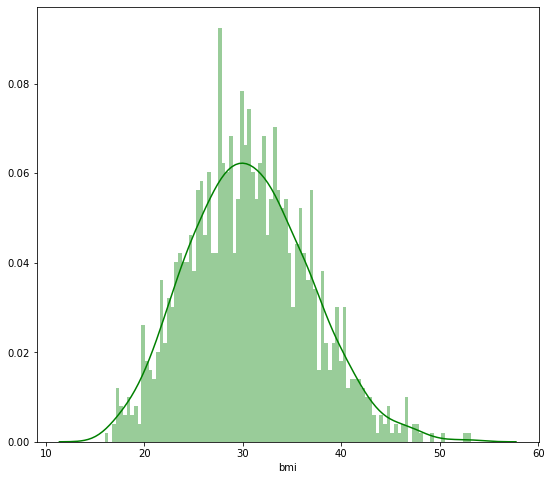

In [5]:
print(df['bmi'].describe())
plt.figure(figsize=(9, 8))
#sns.distplot(df['bmi'], color='g', bins=100, hist_kws={'alpha': 0.4});
sns.distplot(df['bmi'], color='g', bins=100);

In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

df['smoker'] = label_encoder.fit_transform(df['smoker']) 
df['region']=label_encoder.fit_transform(df['region'])
df['sex']=label_encoder.fit_transform(df['sex'])

In [7]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


○ “smoker” ile “charges” arasındaki ilişkiyi inceleyiniz

In [8]:
df['charges'].groupby(df['smoker']).mean()

smoker
0     8434.268298
1    32050.231832
Name: charges, dtype: float64

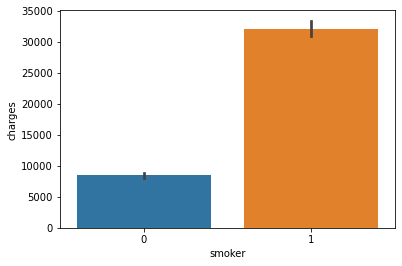

In [9]:
sns.barplot(x="smoker",y="charges",data=df);

In [10]:
df[['smoker', 'charges']].corr()

,smoker,charges
smoker,1.000000,0.787251
charges,0.787251,1.000000


○ “smoker” (Sigara tüketen) ile “region”(Bölge) arasındaki ilişkiyi inceleyiniz.

In [11]:
regions=data_orj['region'].value_counts().index
regions

Index(['southeast', 'southwest', 'northwest', 'northeast'], dtype='object')

In [14]:
smoker_reg1= data_orj[(data_orj['region']=='southeast') & (data_orj['smoker']=='yes')]
nonsmoker_reg1= data_orj[(data_orj['region']=='southeast') & (data_orj['smoker']=='no')]
smoker_reg2= data_orj[(data_orj['region']=='northwest') & (data_orj['smoker']=='yes')]
nonsmoker_reg2= data_orj[(data_orj['region']=='northwest') & (data_orj['smoker']=='no')]
smoker_reg3= data_orj[(data_orj['region']=='southwest') & (data_orj['smoker']=='yes')]
nonsmoker_reg3= data_orj[(data_orj['region']=='southwest') & (data_orj['smoker']=='no')]
smoker_reg4= data_orj[(data_orj['region']=='northeast') & (data_orj['smoker']=='yes')]
nonsmoker_reg4= data_orj[(data_orj['region']=='northeast') & (data_orj['smoker']=='no')]

In [15]:
df_smoker_regions=pd.DataFrame({
    
    "region":regions,#['southeast','northwest','southwest','northeast'],
    "smoker":[smoker_reg1.shape[0],smoker_reg2.shape[0],smoker_reg3.shape[0],smoker_reg4.shape[0]],
    "nonsmoker":[nonsmoker_reg1.shape[1],nonsmoker_reg2.shape[0],nonsmoker_reg3.shape[1],nonsmoker_reg4.shape[0]]  
})


<Figure size 864x576 with 0 Axes>

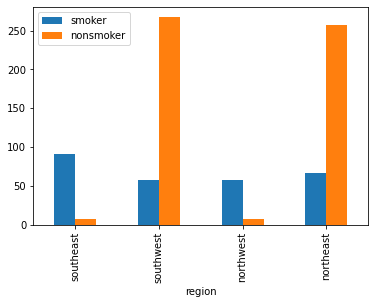

In [16]:

plt.figure(figsize=(12, 8))
df_smoker_regions.plot(x="region", y=["smoker","nonsmoker"], kind="bar");
plt.show();

○ “bmi” ile “sex”(Cinsiyet) arasındaki ilişkiyi inceleyiniz.

In [17]:
females=df[df['sex']==0]
males=df[df['sex']==1]

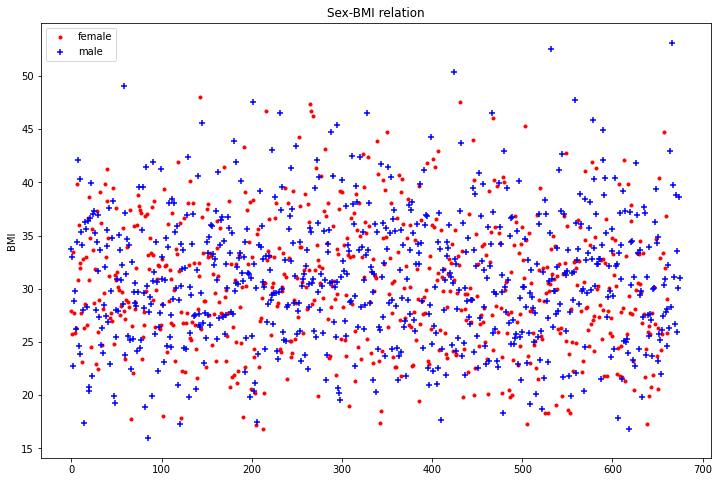

In [18]:
plt.figure(figsize=(12, 8))

plt.ylabel('BMI')
plt.title("Sex-BMI relation")
plt.scatter(list(range(len(np.array(females['bmi'])))), np.array(females['bmi']),marker='.', color='red',label = 'female')
plt.scatter(list(range(len(np.array(males['bmi'])))), np.array(males['bmi']),marker='+', color='blue', label='male')
plt.legend()
plt.show()

In [23]:
df_sex_bmi=pd.DataFrame({
           "sex":["female","male"], 
           "female_bmi_mean":np.array(females['bmi'].mean()),
            "male_bmi_mean":np.array(males['bmi'].mean())  
})

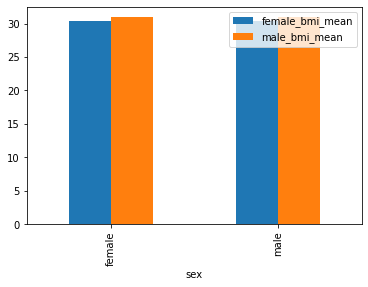

In [24]:

df_sex_bmi.plot(x="sex", y=["female_bmi_mean" ,"male_bmi_mean"], kind="bar")
plt.show()

In [ ]:
○ En çok “children”’a sahip “region”’ı bulunuz.

In [25]:
max_child_id=data_orj[['children']].idxmax()

In [26]:
data_orj['region'].iloc[max_child_id]

32    southwest
Name: region, dtype: object

In [ ]:
○ “Age” ile “bmi” arasındaki ilişkiyi inceleyiniz.

In [27]:
df['age'].corr(df['bmi'])

0.1092718815485352

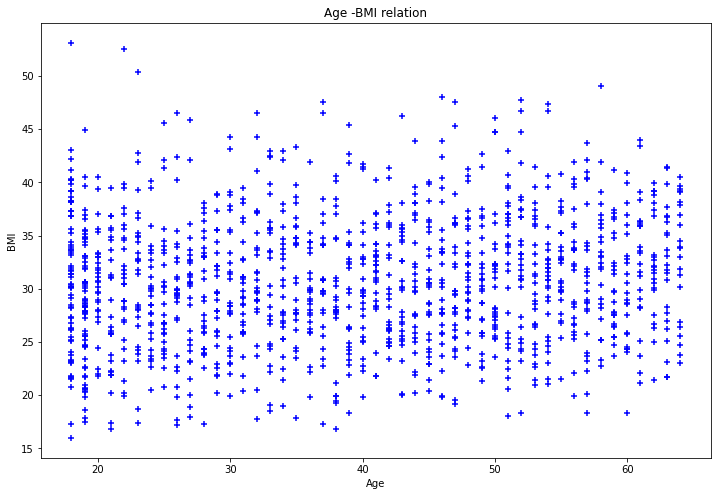

In [28]:
plt.figure(figsize=(12, 8))

plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Age -BMI relation')
plt.scatter(np.array(df['age']), np.array(df['bmi']),marker='+', color='blue')
plt.show()

In [ ]:

○ “bmi” ile “children” arasındaki ilişkiyi inceleyiniz.
○ “bmi” değişkeninde outlier var mıdır? İnceleyiniz.
○ “bmi” ile “charges” arasındaki ilişkiyi inceleyiniz.
○ “region”, “smoker” ve “bmi” arasındaki ilişkiyi bar plot kullanarak inceleyiniz.

○ “bmi” değişkeninde outlier var mıdır? İnceleyiniz.

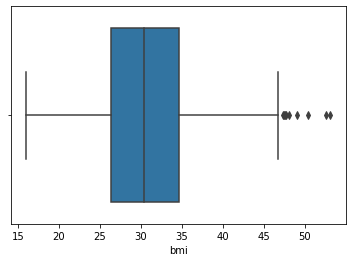

In [29]:
sns.boxplot(df['bmi']);

bmi değişkeninde 46 dan sonrası outlierdır